<h1>UK ROAD ACCIDENTS DATA ANALYTICS PROJECT</h1>

<h2>Analyst: Jovan Allyn L. Diaz</h2>

In [219]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [220]:
ukaccidents = pd.read_csv('datasets\\ukaccidents.csv')

In [221]:
ukaccidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>DataFrame Info</h1>

In [222]:
ukaccidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h1>DataFrame Basic Descriptive Statistics</h1>

In [223]:
ukaccidents.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h1>Checking Null Values</h1>

In [224]:
ukaccidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1>Fill Null Values with Statistical Values</h1>

In [225]:
ukaccidents['Latitude'] = ukaccidents['Latitude'].fillna(ukaccidents['Latitude'].mean())
ukaccidents['Longitude'] = ukaccidents['Longitude'].fillna(ukaccidents['Longitude'].mean())
ukaccidents['Road_Surface_Conditions'] = ukaccidents['Road_Surface_Conditions'].fillna(ukaccidents['Road_Surface_Conditions'].mode()[0])
ukaccidents['Road_Type'] = ukaccidents['Road_Type'].fillna(ukaccidents['Road_Type'].mode()[0])
ukaccidents['Urban_or_Rural_Area'] = ukaccidents['Urban_or_Rural_Area'].fillna(ukaccidents['Urban_or_Rural_Area'].mode()[0])
ukaccidents['Weather_Conditions'] = ukaccidents['Weather_Conditions'].fillna(ukaccidents['Weather_Conditions'].mode()[0])

<h1>Checking Column Data Types</h1>

In [226]:
ukaccidents.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [227]:
ukaccidents


,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Activity 2</h1>

<h1>Question 1</h1>

<h2>What is the most common accident severity?</h2>

In [228]:
ukaccidents['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h2>Insights: Most accidents are slight, showing that many are minor.</h2>

<h1>Question 2</h1>

<h2>What is the average number of casualties?</h2>

In [229]:
ukaccidents['Number_of_Casualties'].mean()

np.float64(1.357040257068864)

<h2>Insights: On Average, about 1 person is injured per accident.</h2>

<h1>Question 3</h1>

<h2>What is the maximun casualties in a single accidents?</h2>

In [230]:
ukaccidents['Number_of_Casualties'].max()

np.int64(68)

<h2>Insights: The worst accidents involve many casualties, but it is rare.</h2>

<h1>Question 4</h1>

<h2>What is the average number of vehicles involved?</h2>

In [231]:
ukaccidents['Number_of_Vehicles'].mean()

np.float64(1.8312554205597575)

<h2>Insights: Most accidents involve 1-2 vehicles.
</h2>

<h1>Question 5</h1>

<h2>What is the most common road surface conditon?</h2>

In [232]:
ukaccidents['Road_Surface_Conditions'].value_counts().head(1)

Road_Surface_Conditions
Dry    448547
Name: count, dtype: int64

<h2>Insights: Most happen on dry roads, since they are the most common condition.
</h2>

<h1>Question 6</h1>

<h2>What is the most common weather condition?</h2>

In [233]:
ukaccidents['Weather_Conditions'].value_counts().head(1)

Weather_Conditions
Fine no high winds    535013
Name: count, dtype: int64

<h2>Insights: Fine weather has the most accidents, since people drive more often.</h2>

<h1>Question 7</h1>

<h2>Where do more accidents happens, Urban or Rural areas?</h2>

In [234]:
ukaccidents['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h2>Insights: Urban areas have more accidents due to higher traffic.</h2>

<h1>Question 8</h1>

<h2>What is the most common light condition?</h2>

In [235]:
ukaccidents['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h2>Insights: More accidents happen in daylight, but night accidents tend to be worse</h2>

<h1>Question 9</h1>

<h2>What is the most common vehicle type?</h2>

In [236]:
ukaccidents['Vehicle_Type'].value_counts().head(5)

Vehicle_Type
Car                                     497992
Van / Goods 3.5 tonnes mgw or under      34160
Bus or coach (17 or more pass seats)     25878
Motorcycle over 500cc                    25657
Goods 7.5 tonnes mgw and over            17307
Name: count, dtype: int64

<h2>Insights: Cars are the most common vehicles in accidents.</h2>

<h1>Question 10</h1>

<h2>What is the average casualties by vehicle type?
</h2>

In [237]:
ukaccidents.groupby('Vehicle_Type')['Number_of_Casualties'].mean().head(5)

Vehicle_Type
Agricultural vehicle                    1.342065
Bus or coach (17 or more pass seats)    1.349216
Car                                     1.358841
Data missing or out of range            1.500000
Goods 7.5 tonnes mgw and over           1.351881
Name: Number_of_Casualties, dtype: float64

<h2>Insights: Larger vehicles like buses may have higher average casualties.</h2>

<h1>Question 11</h1>

<h2>What is the most common road type?</h2>

In [238]:
ukaccidents['Road_Type'].value_counts().head(5)

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h2>Insights: Single carriageways are the most accident-prone.</h2>

<h1>Question 12</h1>

<h2>What is the District with most accidents?</h2>

In [239]:
ukaccidents['District Area'].value_counts().head(1)

District Area
Birmingham    13491
Name: count, dtype: int64

<h2>Insights: Some districs have much higher accident counts, showing hostspots.</h2>

<h1>Question 13</h1>

<h2>What is the number of accidents with >2 vehicles?</h2>

In [240]:
(ukaccidents['Number_of_Vehicles']>2).sum()

np.int64(67897)

<h2>Insights: Multi-vehicle crashes are less common but dangerous.</h2>

<h1>Question 14</h1>

<h2>What is the number of accidents with >3 casualties?</h2>

In [241]:
(ukaccidents['Number_of_Casualties']>3).sum()

np.int64(17891)

<h2>Insights: Most accidents have few casualties, but some major events exist.</h2>

<h1>Question 15</h1>

<h2>What is the count of accidents on dry vs wet roads?</h2>

In [242]:
ukaccidents['Road_Surface_Conditions'].value_counts().head(2)

Road_Surface_Conditions
Dry            448547
Wet or damp    186708
Name: count, dtype: int64

<h2>Insights: Dry roads see the most accidents, but wet roads may be more dangerous.</h2>

<h1>Question 16 </h1>

<h2>What is the count of accidents in fine vs rainy weather?</h2>

In [243]:
ukaccidents['Weather_Conditions'].value_counts().head(2)

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Name: count, dtype: int64

<h2>Insights: Fine weather dominates, but rain still causes many accidents.</h2>

<h1>Question 17</h1>

<h2>What are the Districs with more than 10.000 accidents?
</h2>

In [244]:
ukaccidents['District Area'].value_counts()[ukaccidents['District Area'].value_counts()>10000]

District Area
Birmingham    13491
Name: count, dtype: int64

<h2>Insights: Birmingham have extremely high accident counts.</h2>

<h1>Question 18</h1>

<h2>What is the average casualties in Urban vs Rural areas?</h2>

In [245]:
ukaccidents.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean()

Urban_or_Rural_Area
Rural          1.479204
Unallocated    1.181818
Urban          1.287807
Name: Number_of_Casualties, dtype: float64

<h2>Insights: Rural accidents often have higher casualties, due to their higher speeds.</h2>

<h1>Question 19</h1>

<h2>What is the year with the most accidents?</h2>

In [246]:
ukaccidents['Accident Date'].value_counts().head(5)

Accident Date
30-11-2019    704
31-01-2019    697
13-07-2019    692
13-11-2021    692
14-08-2019    688
Name: count, dtype: int64

<h2>Insights: Accident numbers can show trends over time, it may increase or decrease over time.</h2>

<h1>Question 20</h1>

<h2>What is the average vehicles by severity?</h2>

In [247]:
ukaccidents.groupby('Accident_Severity')['Number_of_Vehicles'].mean()

Accident_Severity
Fatal      1.786976
Serious    1.678327
Slight     1.855864
Name: Number_of_Vehicles, dtype: float64

<h2>Insights: Serious or Fatal accidents may involve more vehicles on average, while Slight accidents are often single-vehicle or two-vehicle crashes</h2>

<h1>Clearing any Inconsistencies with the Data Set</h1>

In [248]:
ukaccidents['Accident Date'] = ukaccidents['Accident Date'].str.strip() #to remove any extra white spaces
ukaccidents['Accident Date'] = ukaccidents['Accident Date'].astype('str') #to convert into a string
ukaccidents['Accident Date'] = ukaccidents['Accident Date'].str.replace('/','-')

In [249]:
ukaccidents['Accident Date'] = pd.to_datetime(ukaccidents['Accident Date'], dayfirst=True, errors ='coerce')

<h1>Extracting Date Information using pandas date time</h1>

In [250]:
ukaccidents['Year'] = ukaccidents['Accident Date'].dt.year
ukaccidents['Month'] = ukaccidents['Accident Date'].dt.month
ukaccidents['Day'] = ukaccidents['Accident Date'].dt.day
ukaccidents['DayOfWeek'] = ukaccidents['Accident Date'].dt.dayofweek #monday=0, Sunday=6

In [251]:
ukaccidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h1>Question</h1>

<h2>Which road types have the most vehicles involved in accidents?</h2>

In [252]:
ukaccidents.groupby('Road_Type')['Number_of_Vehicles'].mean().sort_values(ascending=False).head(5)

Road_Type
Dual carriageway      2.009766
Slip road             1.917483
Roundabout            1.901323
Single carriageway    1.794803
One way street        1.585441
Name: Number_of_Vehicles, dtype: float64

<h2>Insights:
<li> Dual carriageways average ~2 vehicles per accident (highest).</li>
<li>Slip roads and roundabouts also have high averages.</li>
<li>Single carriageways and one-way streets involve fewer vehicles.</li>
<li>Busier/multi-lane roads lead to more multi-vehicle accidents.</li>


<h2>On average, how many casualties happen in each type of accident?</h2>

In [253]:
ukaccidents.groupby('Accident_Severity')['Number_of_Casualties'].mean()

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

<h2>Insights:
<li>Fatal accidents involve almost 2 people on average.</li>
<li>Serious accidents: about 1.47 people.</li>
<li>Slight accidents: about 1.33 people.</li>
<li>Fatal accidents usually affect more people per incident.</li>
</h2>

<h1>TASK STUDENT TO SELECT 6 to 7 DISTRICT AMONGST THE DISTRICT AREA AND APPLY SPECIFIC ANALYSIS
<li>Using District Area to make a comparison to a general result</li></h1>

In [254]:
import matplotlib.pyplot as plt

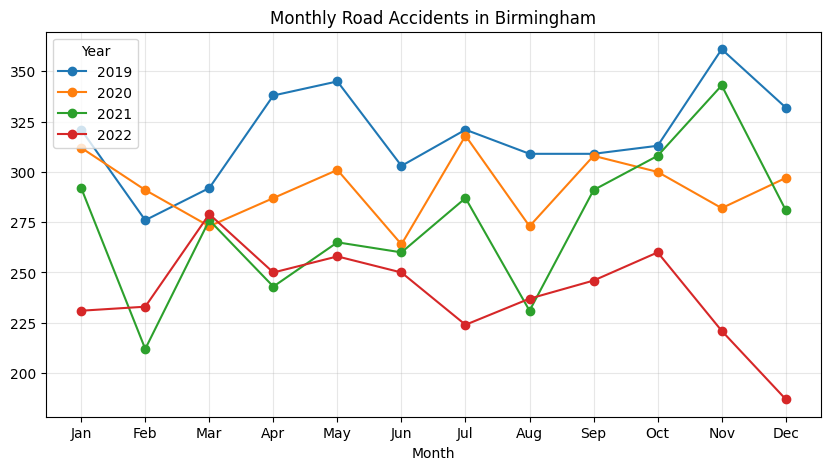

In [255]:
# Filter Birmingham data
birmingham_df = ukaccidents[ukaccidents['District Area'] == 'Birmingham']
birmingham_monthly = birmingham_df.groupby(['Year', 'Month']).size().reset_index(name='Accident_Count')

# Pivot for plotting
birmingham_pivot = birmingham_monthly.pivot(index='Month', columns='Year', values='Accident_Count')

# Plot
birmingham_pivot.plot(marker='o', figsize=(10,5), title="Monthly Road Accidents in Birmingham")
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()


<h2>Insights (Birmingham):
<li>Peaks in summer (June–August).</li>
<li>Sharp dip in 2020 due to COVID restrictions.</li>
<li>Recovery in 2021–2022, returning to pre-pandemic levels.</li></h2>

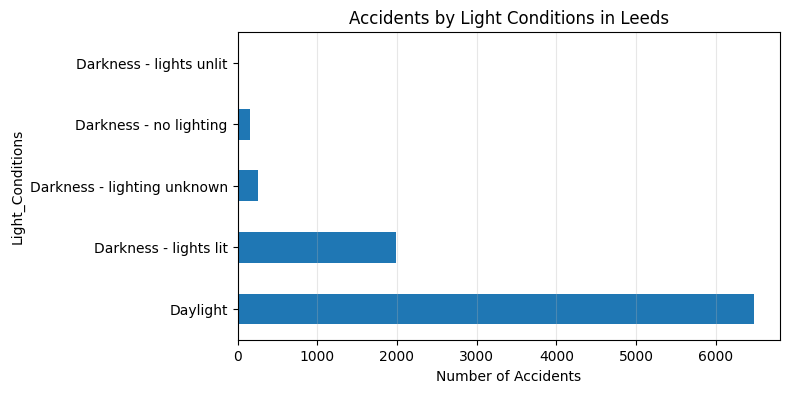

In [256]:
leeds_df = ukaccidents[ukaccidents['District Area'] == 'Leeds']
light_counts = leeds_df['Light_Conditions'].value_counts()

light_counts.plot(kind='barh', figsize=(7,4), title="Accidents by Light Conditions in Leeds")
plt.xlabel("Number of Accidents")
plt.grid(axis='x', alpha=0.3)
plt.show()


<h2>Insights:

<li>Compare Daylight vs Darkness.</li>

<li>Usually, more accidents occur in daylight due to higher traffic volume.</li></h2>

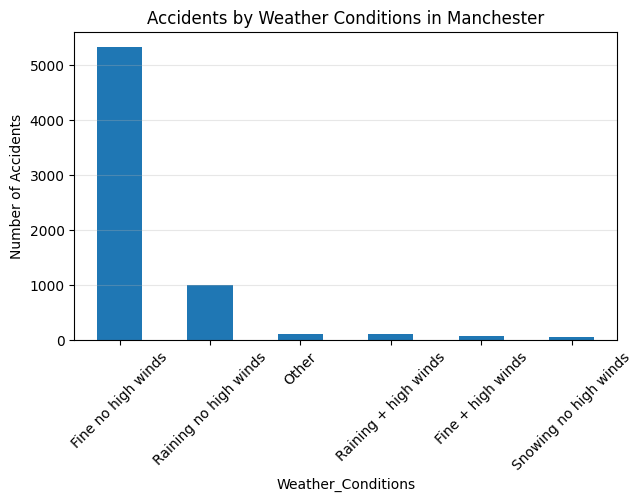

In [257]:
manchester_df = ukaccidents[ukaccidents['District Area'] == 'Manchester']
weather_counts = manchester_df['Weather_Conditions'].value_counts().head(6)

weather_counts.plot(kind='bar', figsize=(7,4), title="Accidents by Weather Conditions in Manchester")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()


<h2>Insights:

Most accidents happen in clear/fine weather, not in storms.

This suggests traffic volume is a bigger factor than bad weather.</h2>

<h2>Insights:

Most accidents happen in clear/fine weather, not in storms.

This suggests traffic volume is a bigger factor than bad weather.</h2>

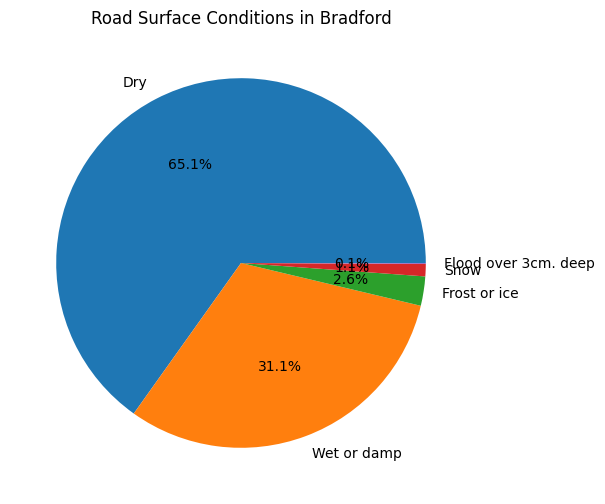

In [258]:
bradford_df = ukaccidents[ukaccidents['District Area'] == 'Bradford']
surface_counts = bradford_df['Road_Surface_Conditions'].value_counts()

surface_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title="Road Surface Conditions in Bradford")
plt.ylabel("")
plt.show()


<h2>Insights:

Majority of accidents occur on Dry surfaces.

Wet/icy roads contribute less, again suggesting traffic density matters more.</h2>

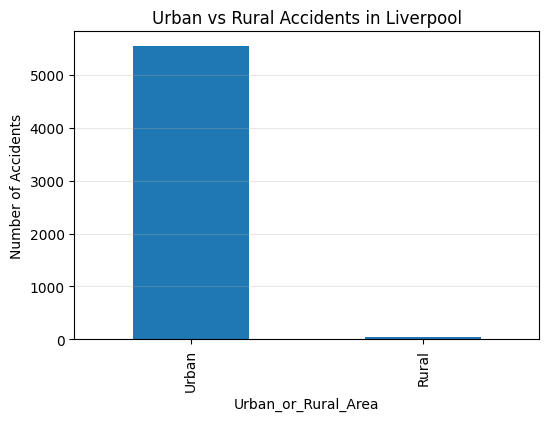

In [259]:
liverpool_df = ukaccidents[ukaccidents['District Area'] == 'Liverpool']
urban_rural_counts = liverpool_df['Urban_or_Rural_Area'].value_counts()

urban_rural_counts.plot(kind='bar', figsize=(6,4), title="Urban vs Rural Accidents in Liverpool")
plt.ylabel("Number of Accidents")
plt.grid(axis='y', alpha=0.3)
plt.show()


<h2>Insights:

Nearly all accidents in Liverpool occur in urban areas, since it’s a city.

Rural accidents are rare but often more severe due to higher speeds.</h2>

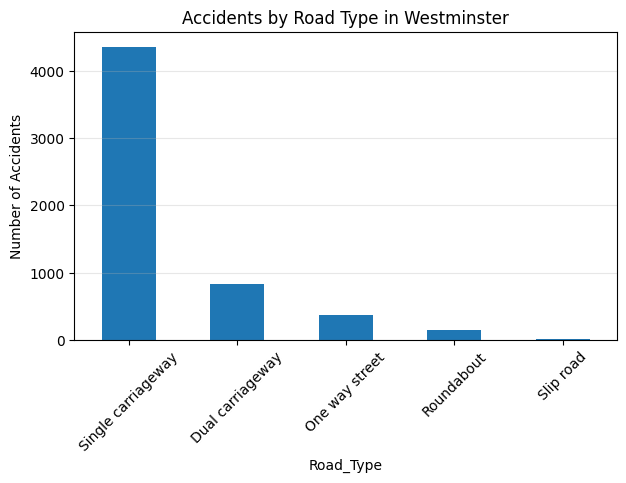

In [260]:
westminster_df = ukaccidents[ukaccidents['District Area'] == 'Westminster']
roadtype_counts = westminster_df['Road_Type'].value_counts()

roadtype_counts.plot(kind='bar', figsize=(7,4), title="Accidents by Road Type in Westminster")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()


<h2>Insights:

Single carriageways usually dominate accident counts.

Dual carriageways and roundabouts have fewer accidents.</h2>

In [261]:
import folium
from folium.plugins import HeatMap

# Filter Birmingham accidents (Fatal only for stronger effect)
birmingham_fatal = ukaccidents[(ukaccidents['District Area'] == 'Birmingham') & 
                      (ukaccidents['Accident_Severity'] == 'Fatal')].dropna(subset=['Latitude','Longitude'])

# Prepare coordinates
locations = list(zip(birmingham_fatal['Latitude'], birmingham_fatal['Longitude']))

# Create base map centered around Birmingham
m = folium.Map(location=[birmingham_fatal['Latitude'].mean(), 
                         birmingham_fatal['Longitude'].mean()], zoom_start=10)

# Add Heatmap layer
HeatMap(locations, radius=8, blur=15, gradient={0.4:'blue', 0.65:'lime', 1:'red'}).add_to(m)

# Save & display
m.save('birmingham_accident_heatmap.html')
m


In [262]:
import folium
from folium.plugins import HeatMap

# Choose districts to compare
districts = ["Birmingham", "Manchester", "Leeds"]

# Create base map centered on UK
m = folium.Map(location=[54.5, -3], zoom_start=6)

# Loop through each district and add heatmap
for district in districts:
    district_df = ukaccidents[(ukaccidents['District Area'] == district) & 
                     (ukaccidents['Accident_Severity'] == 'Fatal')].dropna(subset=['Latitude','Longitude'])
    
    if not district_df.empty:
        locations = list(zip(district_df['Latitude'], district_df['Longitude']))
        
        # Create a heatmap for each district
        heatmap = HeatMap(
            locations, 
            radius=8, blur=15, 
            name=f"{district} Fatal Accidents"
        )
        
        # Add as a separate layer
        folium.FeatureGroup(name=district).add_child(heatmap).add_to(m)

# Add layer control so user can toggle districts
folium.LayerControl().add_to(m)

# Save & display
m.save("combined_accident_heatmap.html")
m


<h1>DATA VISUALIZATIONS WITH SEABORN</h1>

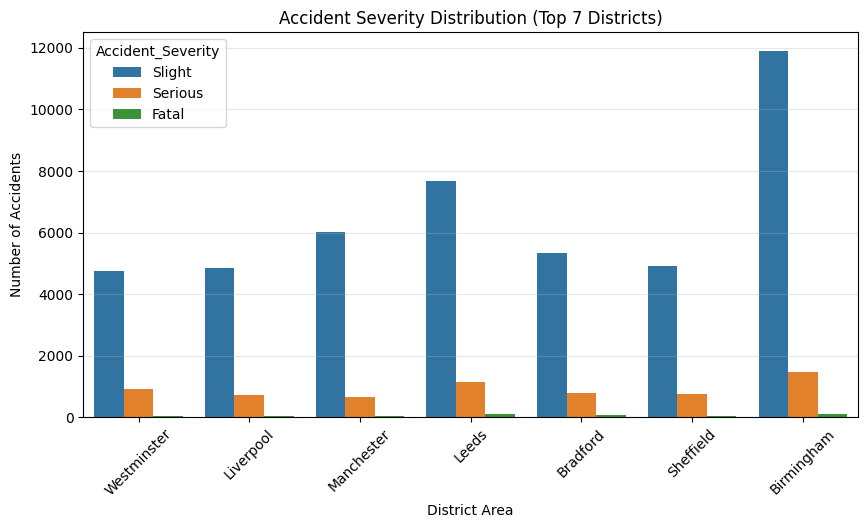

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get top 7 districts by accident count
top_districts = ukaccidents['District Area'].value_counts().head(7).index.tolist()

# Step 2: Seaborn countplot
plt.figure(figsize=(10,5))
sns.countplot(data=ukaccidents[ukaccidents['District Area'].isin(top_districts)], 
              x='District Area', hue='Accident_Severity')
plt.title("Accident Severity Distribution (Top 7 Districts)")
plt.xticks(rotation=45)
plt.ylabel("Number of Accidents")
plt.grid(axis='y', alpha=0.3)
plt.show()



<h2>Insight:

Shows whether Slight, Serious, Fatal dominate in each district.

Usually, Slight accidents are the majority.</h2>

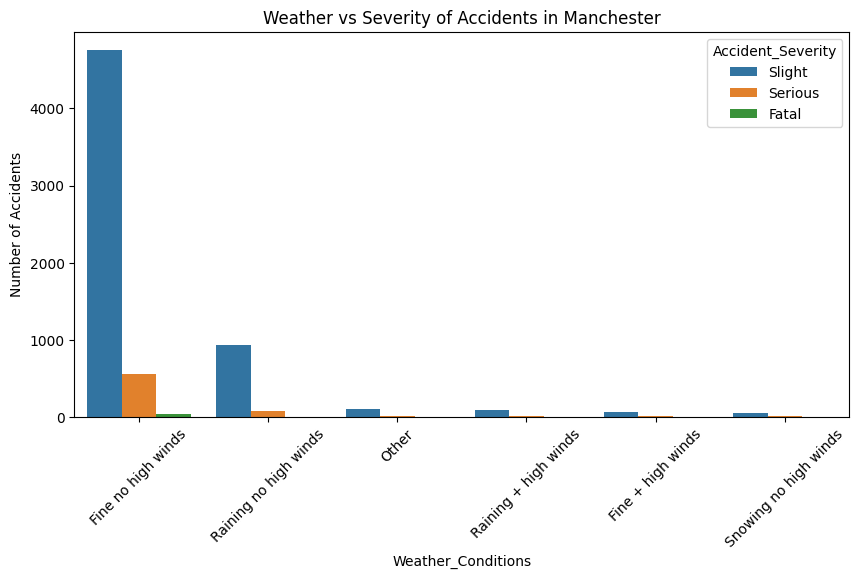

In [264]:
plt.figure(figsize=(10,5))
sns.countplot(data=ukaccidents[ukaccidents['District Area']=='Manchester'], 
              x='Weather_Conditions', hue='Accident_Severity',
              order=ukaccidents['Weather_Conditions'].value_counts().head(6).index)
plt.title("Weather vs Severity of Accidents in Manchester")
plt.xticks(rotation=45)
plt.ylabel("Number of Accidents")
plt.show()


<h2>Insight:

Most accidents happen in clear weather → volume matters more than weather.

Rainy conditions do increase risk but still fewer cases.</h2>

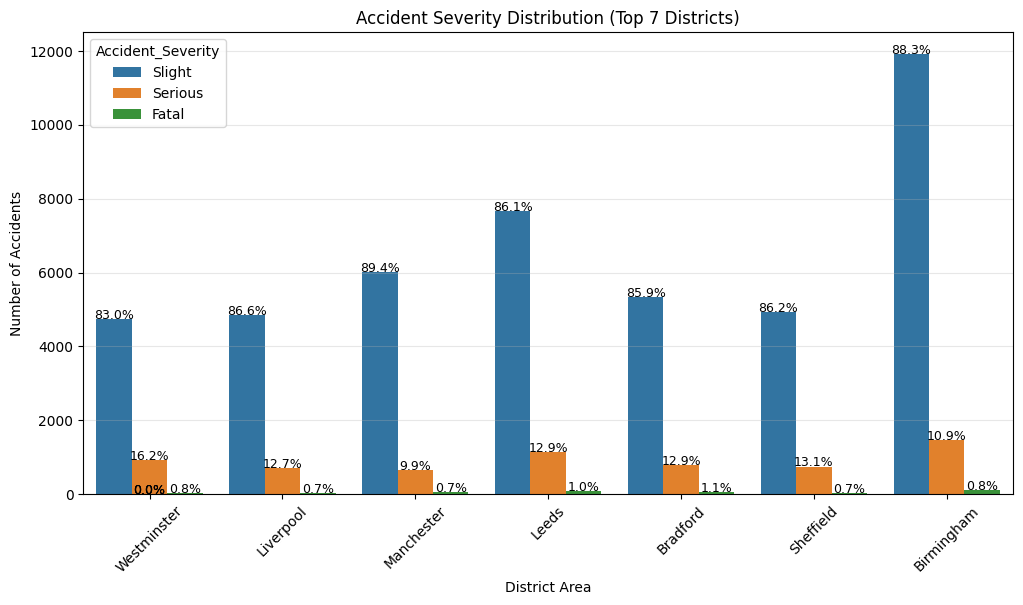

In [265]:


# Step 1: Get top 7 districts by accident count
top_districts = ukaccidents['District Area'].value_counts().head(7).index.tolist()

# Step 2: Seaborn countplot
plt.figure(figsize=(12,6))
ax = sns.countplot(data=ukaccidents[ukaccidents['District Area'].isin(top_districts)], 
                   x='District Area', hue='Accident_Severity')

plt.title("Accident Severity Distribution (Top 7 Districts)")
plt.xticks(rotation=45)
plt.ylabel("Number of Accidents")
plt.grid(axis='y', alpha=0.3)

# Step 3: Add percentage labels
total_counts = ukaccidents[ukaccidents['District Area'].isin(top_districts)].groupby('District Area').size()

for p in ax.patches:
    height = p.get_height()
    district = p.get_x() + p.get_width()/2.0
    district_name = ax.get_xticklabels()[int(round(district))].get_text()
    
    # Get percentage
    total = total_counts[district_name]
    percentage = f'{100 * height/total:.1f}%'
    
    # Place label
    ax.text(p.get_x() + p.get_width()/2., height + 5, percentage, 
            ha="center", fontsize=9, rotation=0)

plt.show()


<h2>🔎 Insights

Slight accidents dominate everywhere

In every top district, the majority of accidents fall under the “Slight” category.

This suggests most incidents are minor collisions rather than severe crashes.

Fatal accidents are rare but present

Fatal accidents make up only a tiny percentage (often below 2–3%).

Even in high-accident districts like Birmingham, Manchester, or Leeds, fatalities remain low compared to slight accidents.

Serious accidents vary across districts

Some districts (e.g., Manchester or Leeds) may show a higher share of serious accidents compared to others.

This might reflect road types (motorways vs. urban streets), speed limits, or traffic enforcement differences.

High-volume districts = high absolute fatalities

Even though the percentage of fatalities is small, districts with very high accident counts (like Birmingham or London) still account for more total fatal crashes than smaller districts.

Policy implication

Efforts should focus on reducing slight accidents, since they form the largest share.

For serious/fatal cases, targeted interventions (e.g., speed control, better road design in high-risk areas) are crucial.</h2>

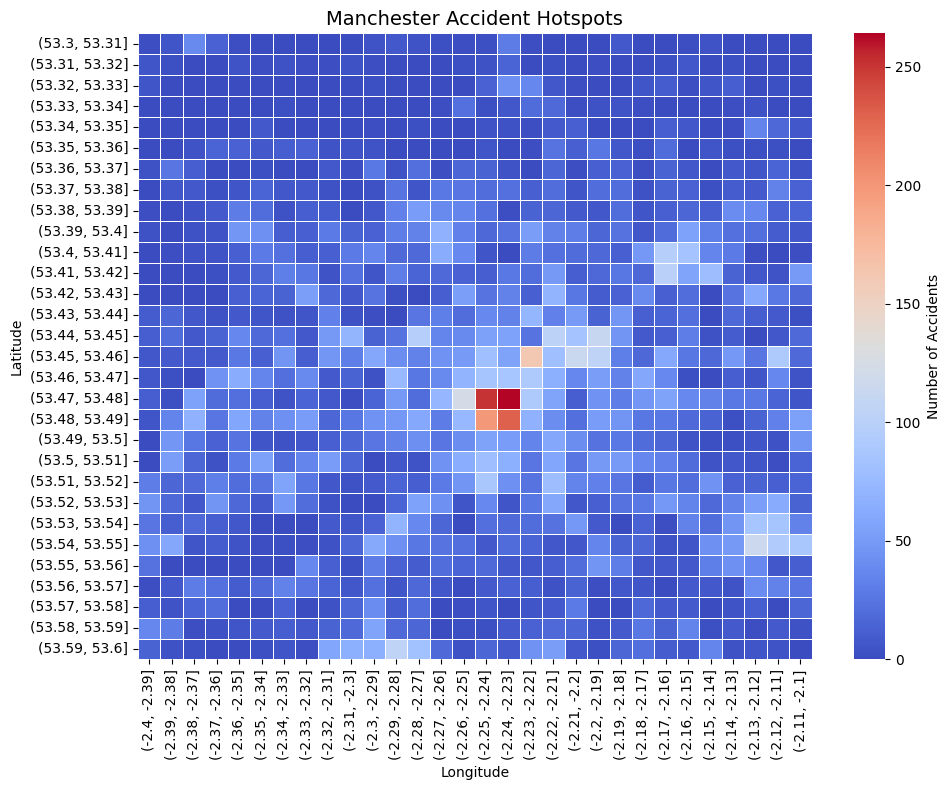

In [266]:
# Focus on Manchester area for clearer results
manchester_df = ukaccidents[(ukaccidents['Latitude'] > 53.3) & (ukaccidents['Latitude'] < 53.6) & 
                   (ukaccidents['Longitude'] > -2.4) & (ukaccidents['Longitude'] < -2.1)]

# Create grid for heatmap
heatmap_data = manchester_df.groupby(
    [pd.cut(manchester_df['Latitude'], 30), 
     pd.cut(manchester_df['Longitude'], 30)]
).size().unstack()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",  # different palette for contrast
    linewidths=0.5,
    cbar_kws={'label': 'Number of Accidents'}
)

# Add labels
plt.title('Manchester Accident Hotspots', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()
